In [ ]:
!pip3 install pandas
!pip3 install jinja2
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install numpy

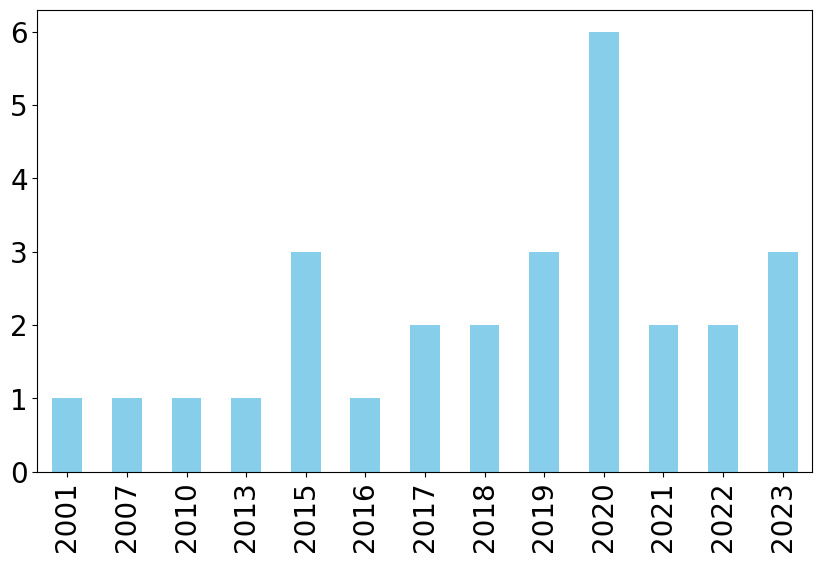

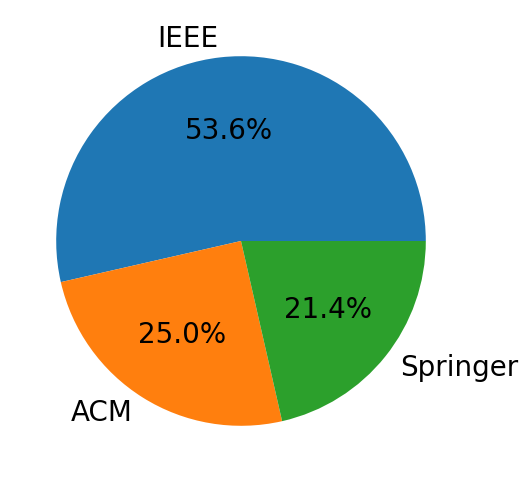

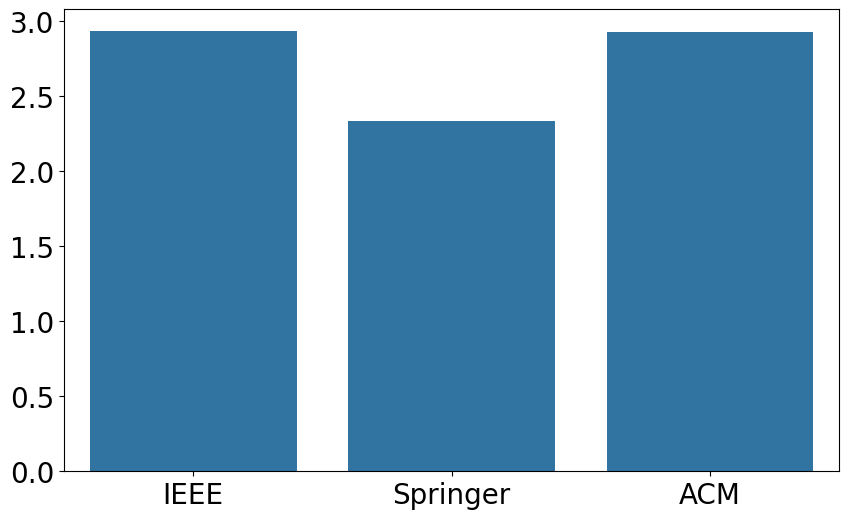

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming data is in csv format and stored as 'data.csv'
df = pd.read_csv('data.csv')
plt.rcParams.update({'font.size': 20})

# Number of papers per year
papers_per_year = df['Year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
papers_per_year.plot(kind='bar', color='skyblue')
plt.title('')
plt.gca().set_xlabel('')
plt.gca().set_ylabel('')
plt.show()

# Number of papers per source

papers_per_source = df['Source'].value_counts()
plt.figure(figsize=(10, 6))
papers_per_source.plot(kind='pie', autopct='%1.1f%%')
plt.title('')
plt.gca().set_xlabel('')
plt.gca().set_ylabel('')
plt.show()



# Assuming df is your DataFrame and it includes columns 'Source' and 'Quality score'
# You might need to convert 'Quality score' to numeric values if they are not.
df['Quality score'] = pd.to_numeric(df['Quality Score'])

# Group by 'Source' and calculate the mean 'Quality score'
source_quality_score = df.groupby('Source')['Quality Score'].mean()

# Define a custom order for the sources
custom_order = ['IEEE', 'Springer', 'ACM']

# Reorder the sources based on the custom order
papers_per_source_ordered = source_quality_score.reindex(custom_order)

# Create a bar plot
plt.figure(figsize=(10,6))
sns.barplot(x=papers_per_source_ordered.index, y=papers_per_source_ordered.values)

# Give the plot a title and labels
plt.title('')
plt.xlabel('')
plt.ylabel('')

# Show the plot
plt.show()


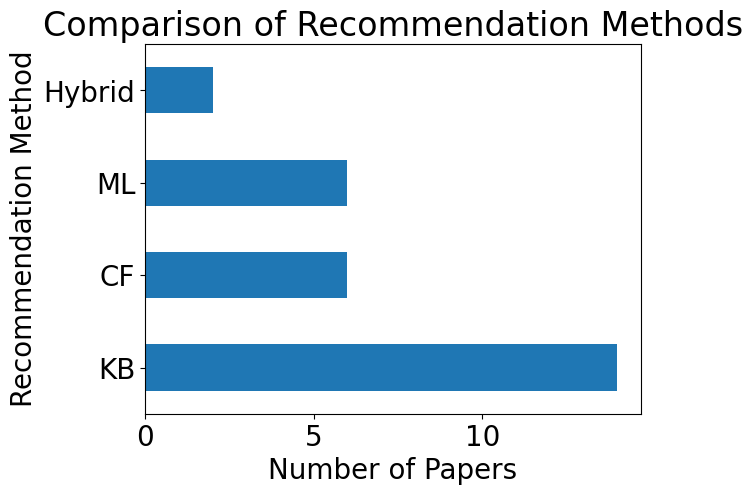

In [7]:
# Plot 2: Comparison of recommendation methods
df['Recommendation Method'].value_counts().plot(kind='barh')
plt.title('Comparison of Recommendation Methods')
plt.xlabel('Number of Papers')
plt.ylabel('Recommendation Method')
plt.show()

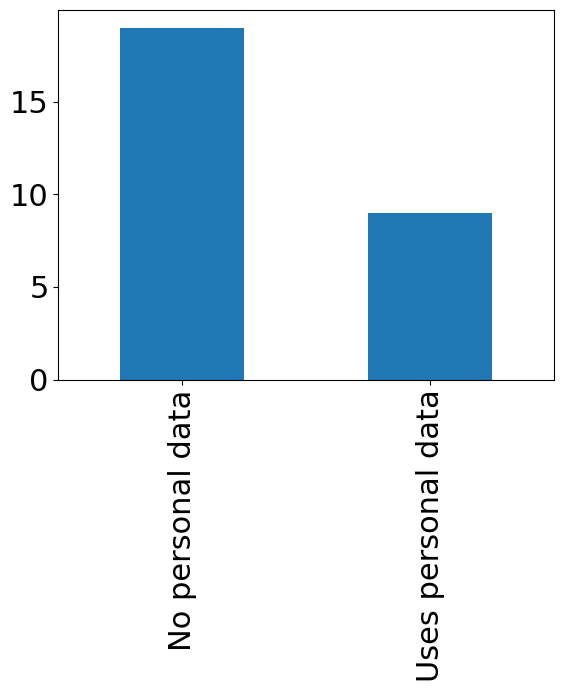

In [10]:
# Plot 4: Overview of privacy considerations
df['Privacy'].value_counts().plot(kind='bar')
plt.title('')
plt.gca().set_xlabel('')
plt.gca().set_ylabel('')
plt.show()

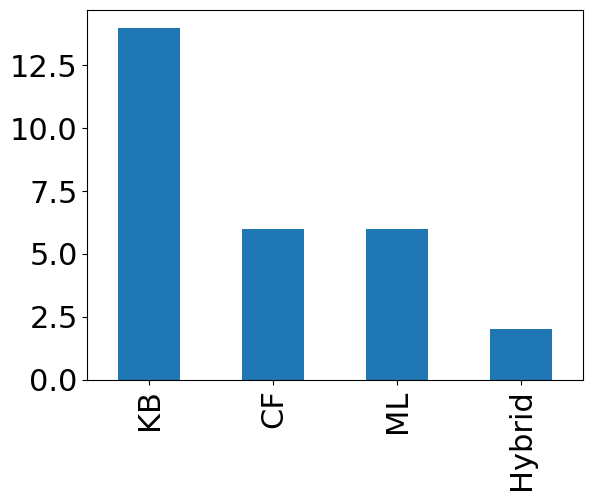

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your dataframe
df = pd.read_csv('data.csv')

# Create a new dataframe with counts
outcome_counts = df['Recommendation Method'].value_counts()

# Plot
outcome_counts.plot(kind='bar')
plt.gca().set_xlabel('')
plt.gca().set_ylabel('')
plt.show()


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataset
df = pd.read_csv('data.csv')

# Display the first few rows of the dataframe to understand its structure
df.head()

# Function to split and wrap labels with two or more words
def split_and_flatten(series):
    return series.str.split('\n').explode()
def split_wrap_labels(labels):
    return ['\n'.join(label.split()) if len(label.split()) >= 2 else label for label in labels]

# Prepare data for visualizations
# 1. Distribution of papers over years
papers_per_year = df['Year'].value_counts().sort_index()

# 2. Distribution of the selected papers by source
papers_by_source = df['Source'].value_counts()

# 3. Supported tasks (will aggregate and visualize the top ones due to potential variety)
supported_tasks = df['Supported Tasks'].value_counts().head(10)  # Top 10 supported tasks

# 4. End users
end_users = df['End User'].value_counts()

# 5. Recommendation Methods
recommendation_methods = df['Recommendation Method'].value_counts()

# 6. Inclusion of Learning Outcomes
learning_outcomes_inclusion = df['Includes Learning Outcomes'].value_counts()

# 7. Target metric
target_metrics = df['Target Metric'].value_counts().head(10)  # Top 10 target metrics

# 8. Evaluation method
evaluation_methods = df['Evaluation Method'].value_counts()

# 9. Assessment of the achievement of outcomes
assessment_of_outcomes = df['Outcome-based Assessment'].value_counts()

# 10. Dataset used for evaluation
datasets_used = df['Dataset'].value_counts().head(10)  # Top 10 datasets

/var/folders/kv/0xqych_57bqdrpgl9sfxj72r0000gn/T/ipykernel_23957/409134726.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=target_metrics_distribution.values, y=wrapped_labels, orient='h', palette='deep')


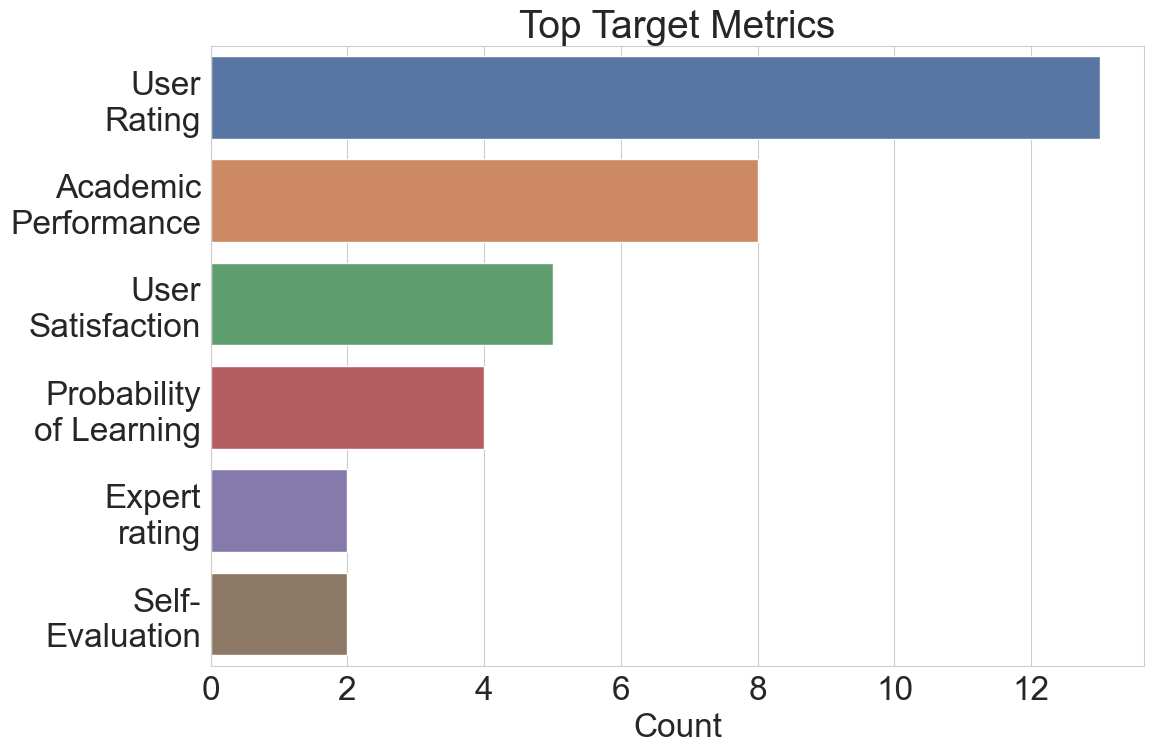

In [21]:
# Adjusting 'Target metric' based on the new instruction
target_metrics_adjusted = split_and_flatten(df['Target Metric'])

# Recalculating distribution with adjustments
target_metrics_distribution = target_metrics_adjusted.value_counts()

# Apply split-wrap function to the target metric labels
wrapped_labels = split_wrap_labels(target_metrics_distribution.index)
# make 'Probability\nof\nLearning' to be 'Probability\nof Learning'
wrapped_labels = [label.replace('of\n', 'of ') for label in wrapped_labels]
wrapped_labels = [label.replace('-', '-\n') for label in wrapped_labels]


# Create adjusted plot with larger labels
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=target_metrics_distribution.values, y=wrapped_labels, orient='h', palette='deep')
ax.set_title("Top Target Metrics", fontsize=28)
ax.set_xlabel("Count", fontsize=24)
ax.set_ylabel("", fontsize=22)
ax.tick_params(labelsize=24)
plt.tight_layout()
plt.show()


/var/folders/kv/0xqych_57bqdrpgl9sfxj72r0000gn/T/ipykernel_23957/2858689215.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=supported_tasks_distribution.values, y=supported_tasks_distribution.index, orient='h', palette='deep')


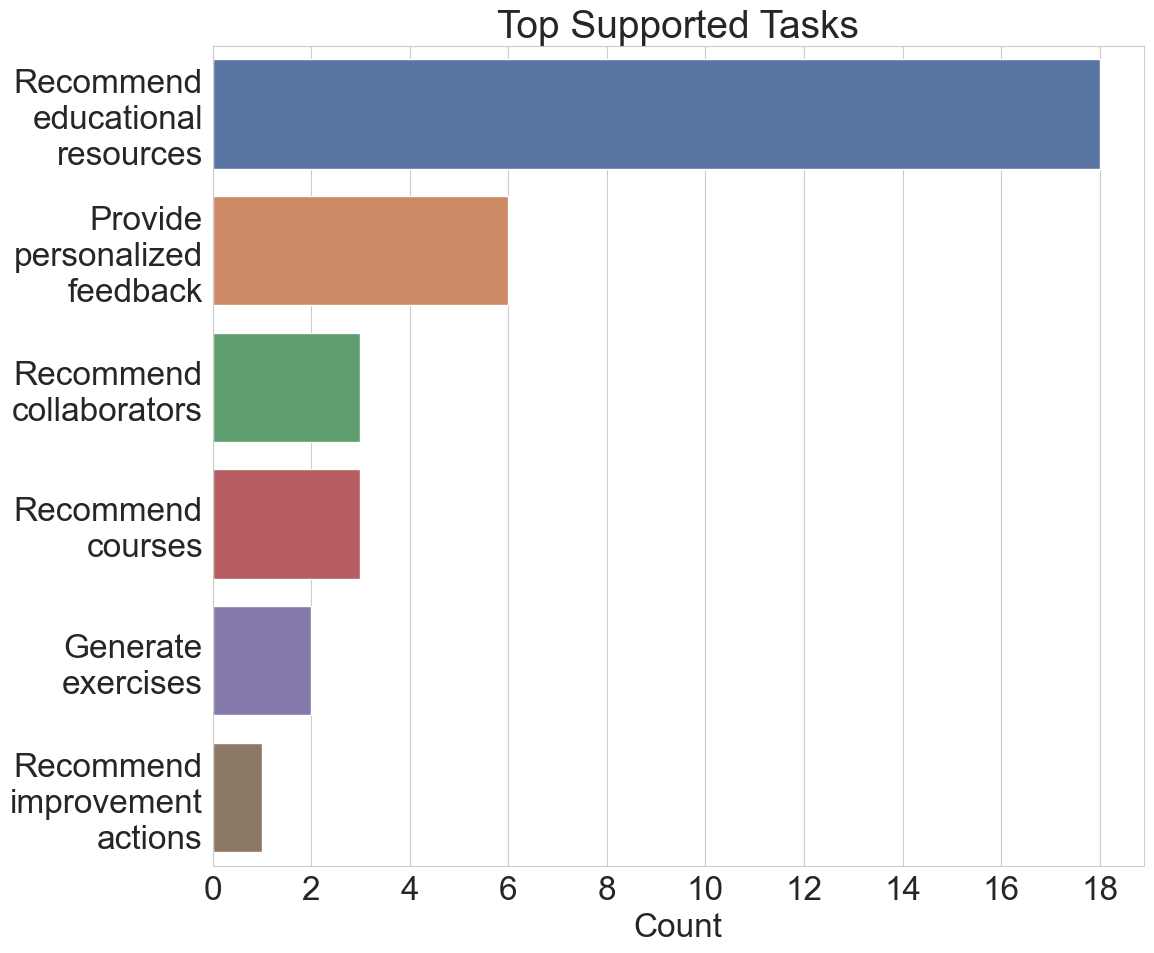

In [23]:
# Adjusting 'Target metric' based on the new instruction
supported_tasks_adjusted = split_and_flatten(df['Supported Tasks'])

# Recalculating distribution with adjustments
supported_tasks_distribution = supported_tasks_adjusted.value_counts()

# Assuming split_and_flatten works correctly and supported_tasks_distribution is obtained correctly

# Create a mapping of old labels to new labels
label_mapping = {label: '\n'.join(label.split()) if len(label.split()) >= 2 else label for label in supported_tasks_distribution.index}

# Apply the label mapping
supported_tasks_distribution.index = supported_tasks_distribution.index.map(label_mapping)


# Create adjusted plot with larger labels
plt.figure(figsize=(12, 10))
# use several colors for the plot
ax = sns.barplot(x=supported_tasks_distribution.values, y=supported_tasks_distribution.index, orient='h', palette='deep')
ax.set_title("Top Supported Tasks", fontsize=28)
ax.set_xlabel("Count", fontsize=24)
ax.set_ylabel("", fontsize=22)
ax.tick_params(labelsize=24)
# use integer values on the x-axis
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.tight_layout()
plt.show()



/var/folders/kv/0xqych_57bqdrpgl9sfxj72r0000gn/T/ipykernel_23957/3843347316.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=evaluation_methods_distribution.values, y=evaluation_methods_distribution.index, orient='h', palette='deep')


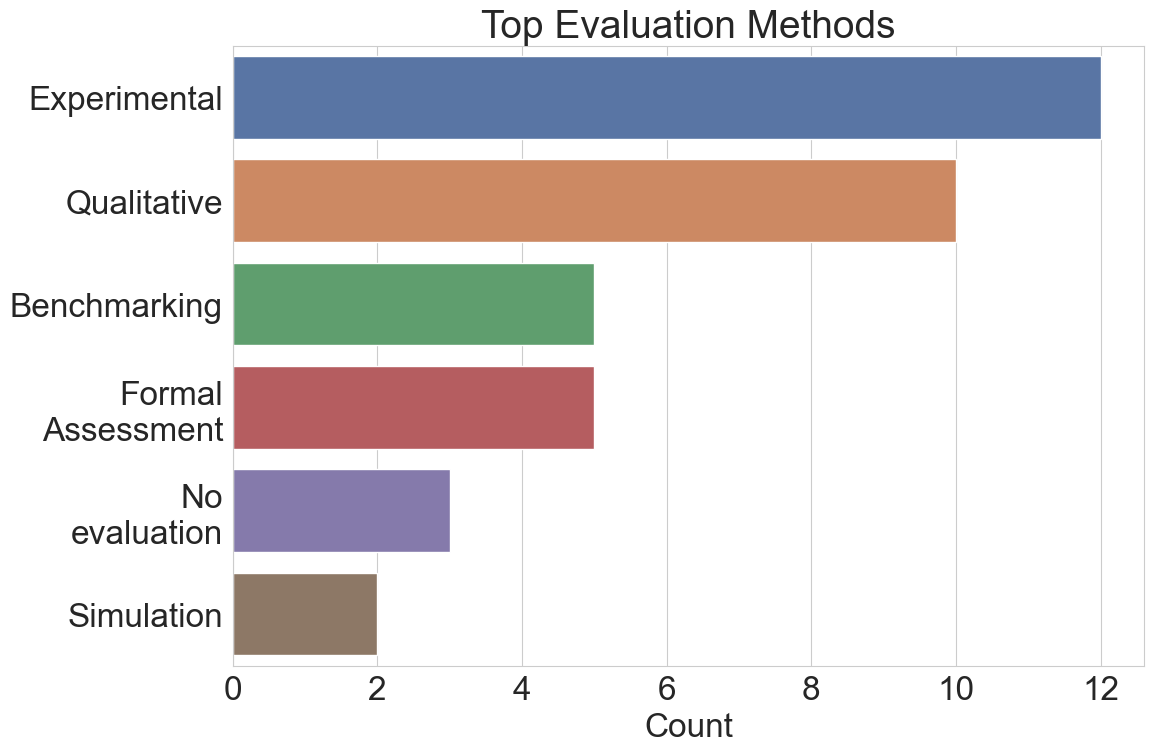

In [24]:
# make evaluation_methods_adjusted
evaluation_methods_adjusted = split_and_flatten(df['Evaluation Method'])
evaluation_methods_distribution = evaluation_methods_adjusted.value_counts()

# Create a mapping of old labels to new labels
label_mapping = {label: '\n'.join(label.split()) if len(label.split()) >= 2 else label for label in evaluation_methods_distribution.index}

# Apply the label mapping
evaluation_methods_distribution.index = evaluation_methods_distribution.index.map(label_mapping)

# Create adjusted plot with larger labels
plt.figure(figsize=(12, 8))
# use several colors for the plot
ax = sns.barplot(x=evaluation_methods_distribution.values, y=evaluation_methods_distribution.index, orient='h', palette='deep')
ax.set_title("Top Evaluation Methods", fontsize=28)
ax.set_xlabel("Count", fontsize=24)
ax.set_ylabel("", fontsize=22)
ax.tick_params(labelsize=24)
# use integer values on the x-axis
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.tight_layout()
plt.show()


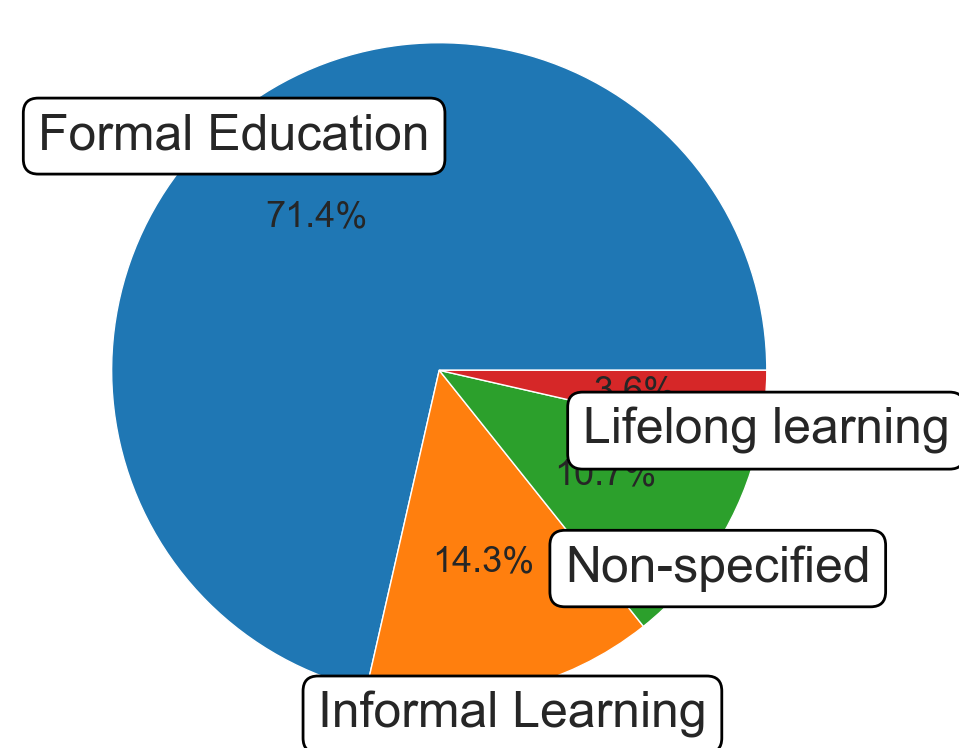

<Figure size 640x480 with 0 Axes>

In [25]:
import numpy as np

context_adjusted = split_and_flatten(df['Educational Context'])
context_distribution = context_adjusted.value_counts()


# Apply split-wrap function to the context labels
wrapped_context_labels = split_wrap_labels(context_distribution.index)

# do the same for Includes Learning Outcomes
plt.figure(figsize=(10, 8))
patches, texts, autotexts = plt.pie(context_distribution, labels=context_distribution.index, autopct='%1.1f%%', textprops={'fontsize': 26})
plt.setp(texts, text="")
# plt.title("Educational Context Distribution", fontsize=34)

plt.axis('equal')
for i, (patch, txt) in enumerate(zip(patches, context_distribution.index)):
    ang = (patch.theta2 - patch.theta1)/2. + patch.theta1
    x = patch.r * np.cos(np.deg2rad(ang))
    y = patch.r * np.sin(np.deg2rad(ang))
    plt.annotate(txt, xy=(x, y), xytext=(x, y), textcoords='offset points', ha='center', va='top', 
                fontsize=36, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=2))
plt.tight_layout()
plt.show()

    

    


plt.tight_layout()
plt.show()

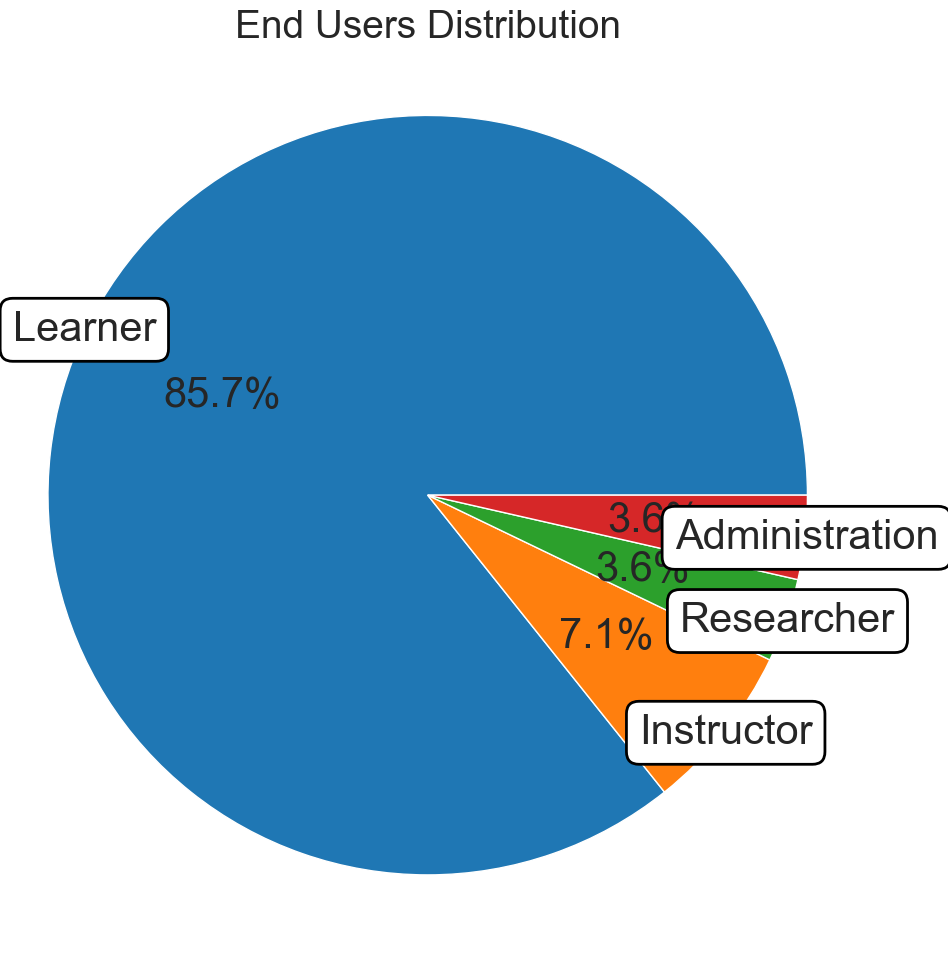

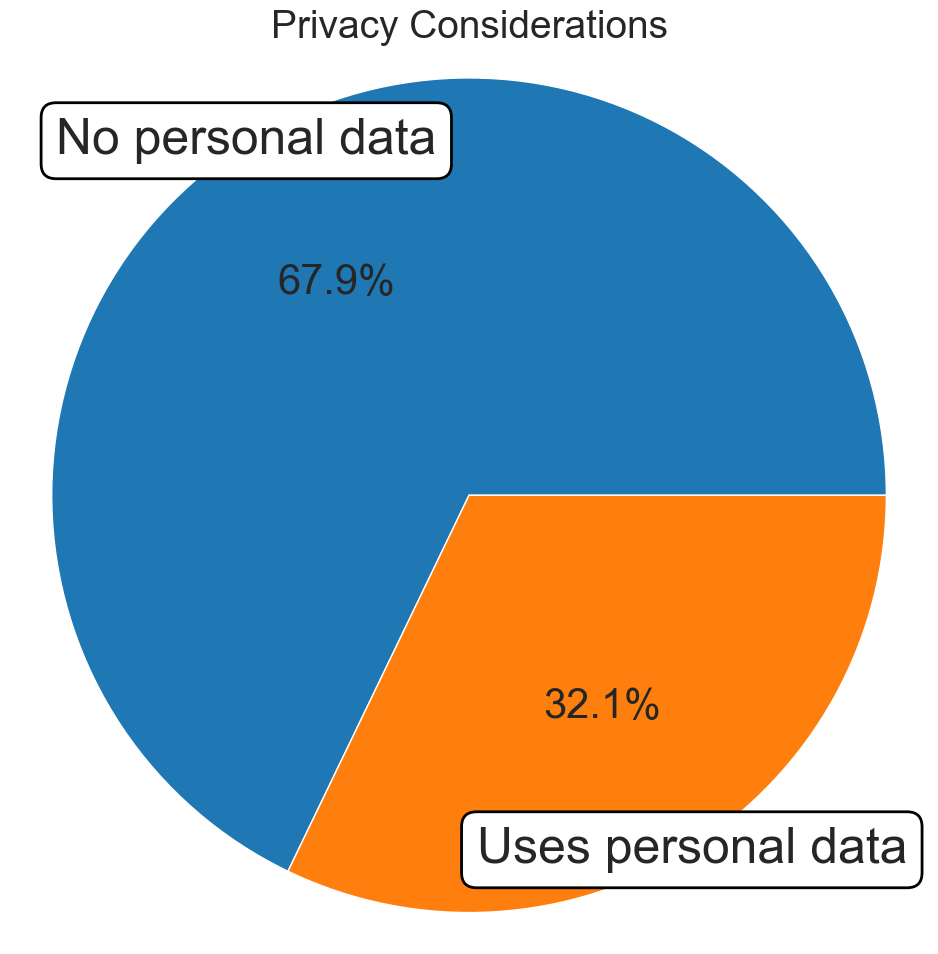

In [26]:

import numpy as np
# Plotting the pie chart with annotations having frames around the labels
fig, ax = plt.subplots(figsize=(10, 10))


end_users_distribution = df['End User'].value_counts()
privacy_distribution = df['Privacy'].value_counts()

# Create the pie chart
patches, texts, autotexts = ax.pie(end_users_distribution, autopct='%1.1f%%', textprops={'fontsize': 30})

# Remove the default labels
plt.setp(texts, text="")

# Title and layout adjustment
ax.set_title("End Users Distribution", fontsize=28)
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Adding annotations with frames
for i, (patch, txt) in enumerate(zip(patches, end_users_distribution.index)):
    ang = (patch.theta2 - patch.theta1)/2. + patch.theta1
    x = patch.r * np.cos(np.deg2rad(ang))
    y = patch.r * np.sin(np.deg2rad(ang))

    # Annotation with a box/frame
    ax.annotate(txt, xy=(x, y), xytext=(x, y), textcoords='offset points', ha='center', va='center', 
                fontsize=30,  # Increased font size
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=2))

plt.tight_layout()
plt.show()

# do the same for Privacy
plt.figure(figsize=(10, 10))
patches, texts, autotexts = plt.pie(privacy_distribution, autopct='%1.1f%%', textprops={'fontsize': 30})
plt.setp(texts, text="")
plt.title("Privacy Considerations", fontsize=28)
plt.axis('equal')
for i, (patch, txt) in enumerate(zip(patches, privacy_distribution.index)):
    ang = (patch.theta2 - patch.theta1)/2. + patch.theta1
    x = patch.r * np.cos(np.deg2rad(ang))
    y = patch.r * np.sin(np.deg2rad(ang))
    plt.annotate(txt, xy=(x, y), xytext=(x, y), textcoords='offset points', ha='center', va='center', 
                fontsize=36, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=2))
plt.tight_layout()
plt.show()

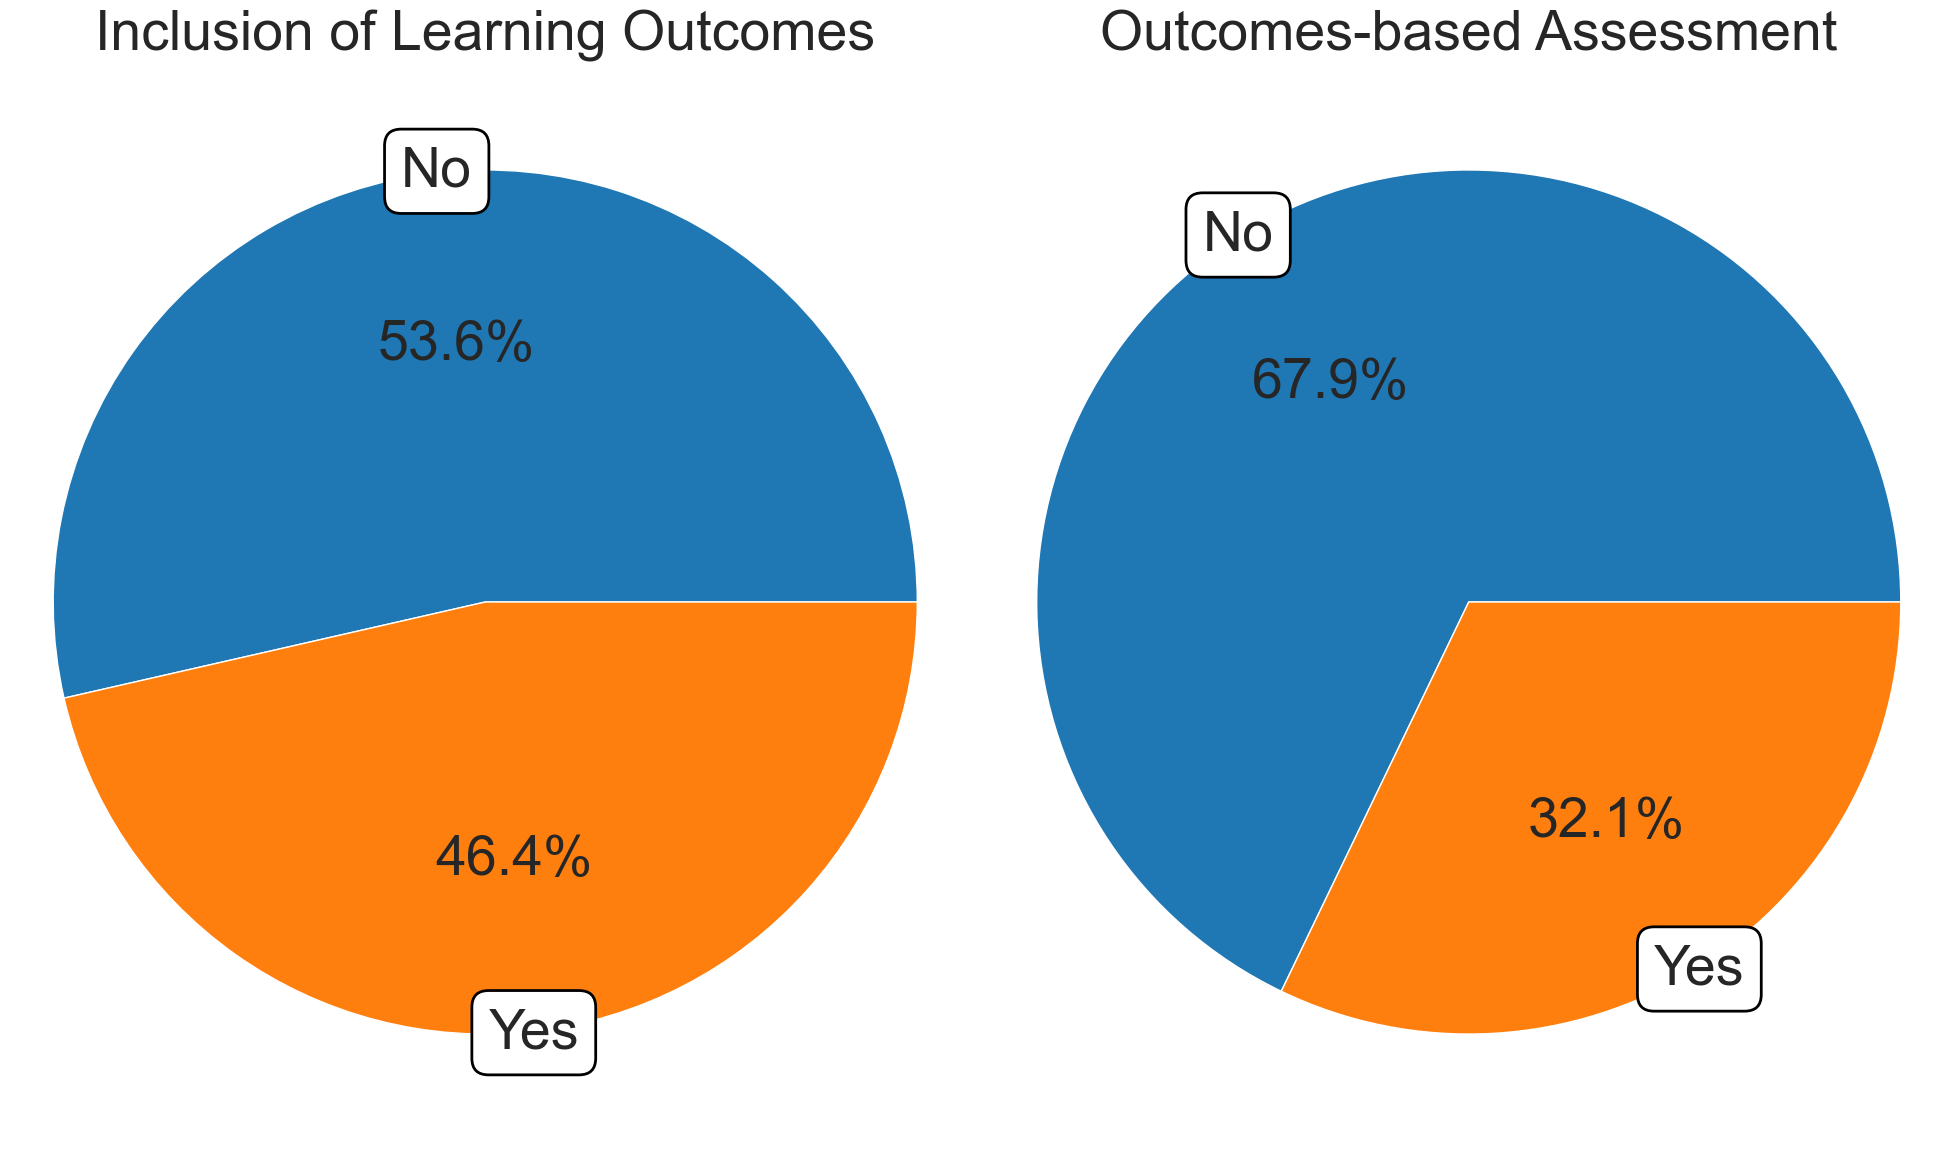

In [27]:

learning_outcomes_distribution = df['Includes Learning Outcomes'].value_counts()
assessment_of_outcomes_distribution = df['Outcome-based Assessment'].value_counts()


# combine the two pie charts into one
fig, axs = plt.subplots(1, 2, figsize=(20, 12))


# Inclusion of Learning Outcomes
patches, texts, autotexts = axs[0].pie(learning_outcomes_distribution, autopct='%1.1f%%', textprops={'fontsize': 40})
plt.setp(texts, text="")
axs[0].set_title("Inclusion of Learning Outcomes", fontsize=40)
axs[0].axis('equal')
for i, (patch, txt) in enumerate(zip(patches, learning_outcomes_distribution.index)):
    ang = (patch.theta2 - patch.theta1)/2. + patch.theta1
    x = patch.r * np.cos(np.deg2rad(ang))
    y = patch.r * np.sin(np.deg2rad(ang))
    axs[0].annotate(txt, xy=(x, y), xytext=(x, y), textcoords='offset points', ha='center', va='center', 
                fontsize=40, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=2))
    
# Assessment of the Achievement of Outcomes
patches, texts, autotexts = axs[1].pie(assessment_of_outcomes_distribution, autopct='%1.1f%%', textprops={'fontsize': 40})
plt.setp(texts, text="")
axs[1].set_title("Outcomes-based Assessment", fontsize=40)
axs[1].axis('equal')
for i, (patch, txt) in enumerate(zip(patches, assessment_of_outcomes_distribution.index)):
    ang = (patch.theta2 - patch.theta1)/2. + patch.theta1
    x = patch.r * np.cos(np.deg2rad(ang))
    y = patch.r * np.sin(np.deg2rad(ang))
    plt.annotate(txt, xy=(x, y), xytext=(x, y), textcoords='offset points', ha='center', va='center', 
                fontsize=40, bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=2))
    
plt.tight_layout()
plt.show()



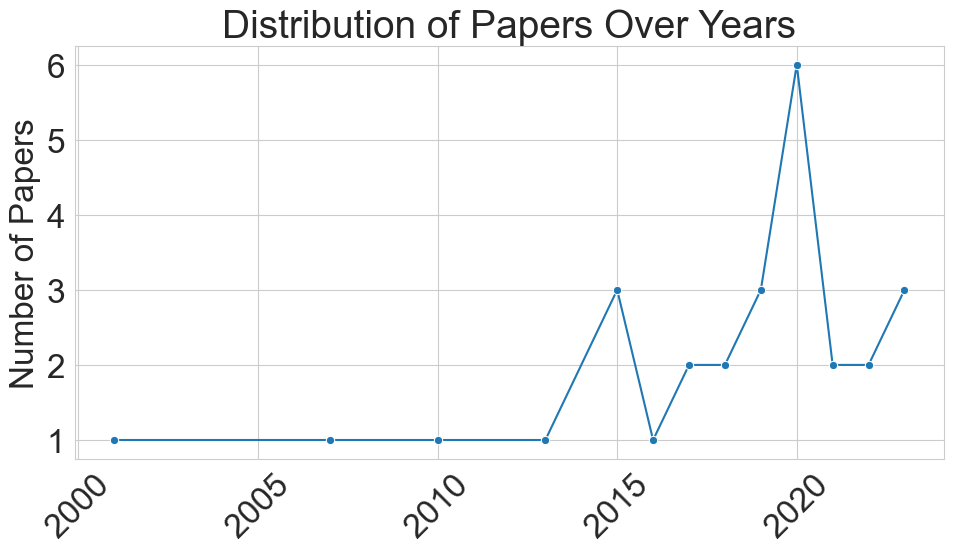

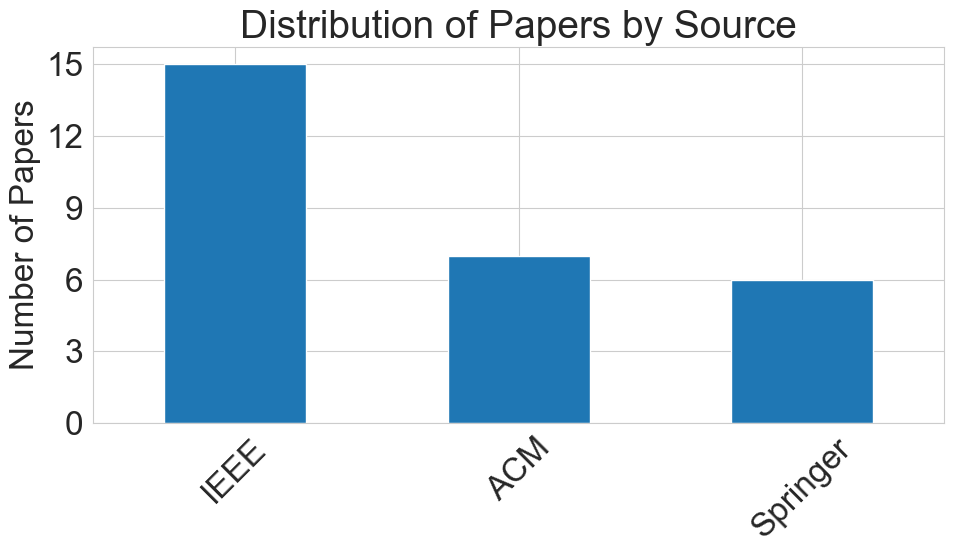

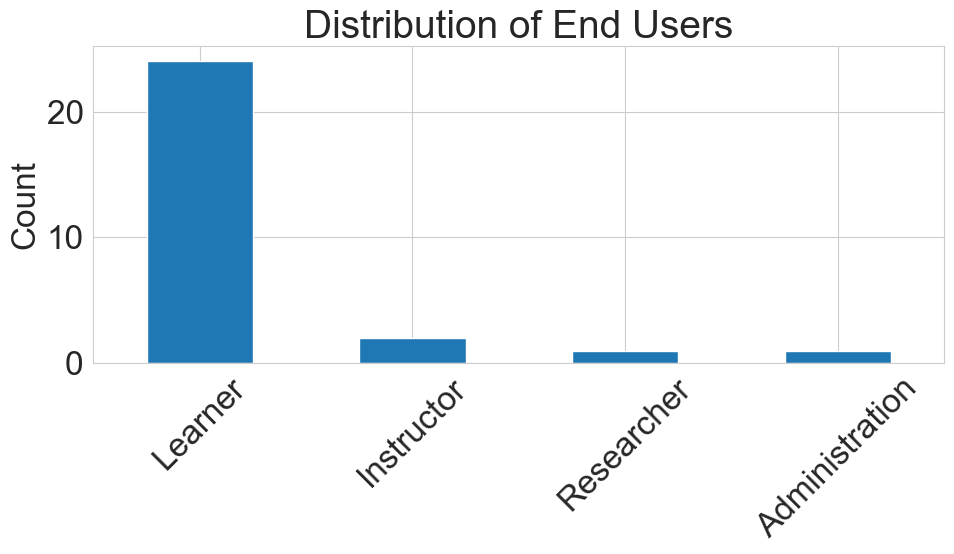

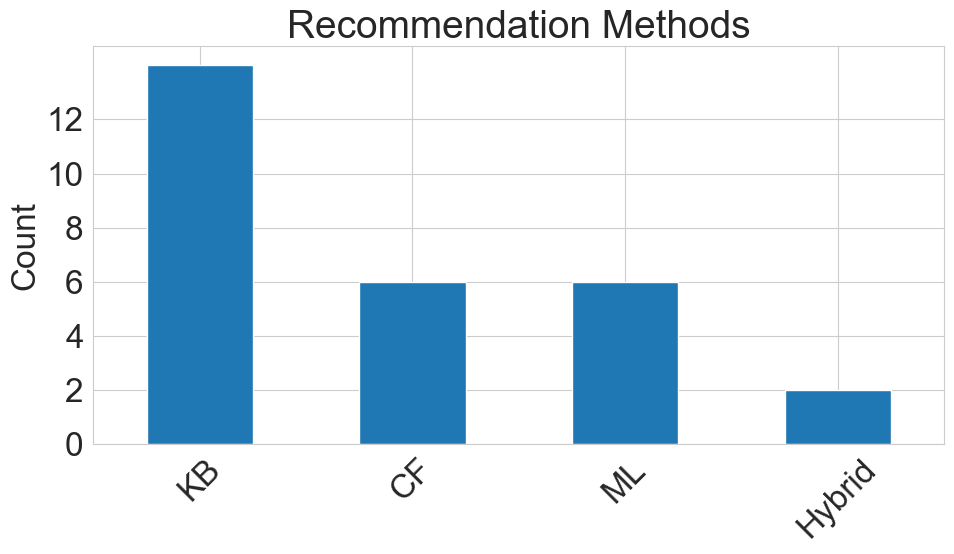

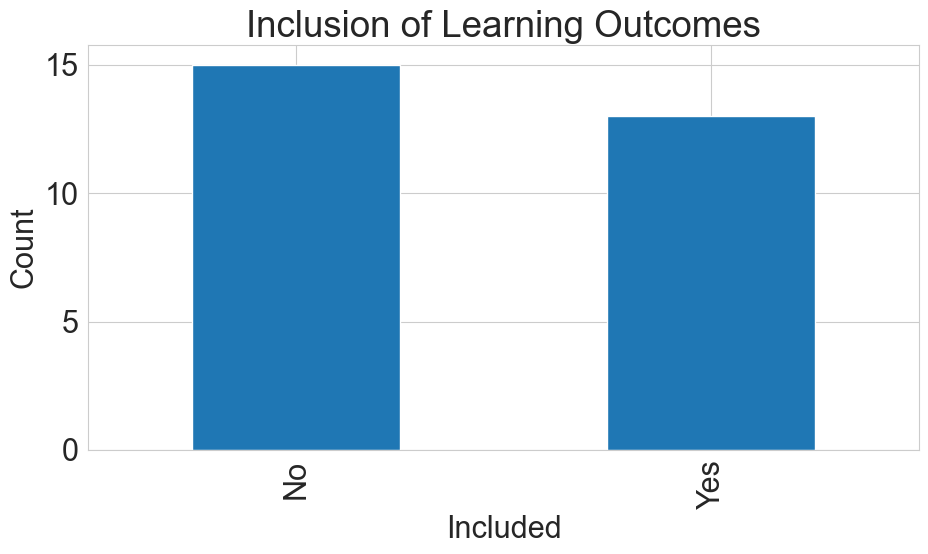

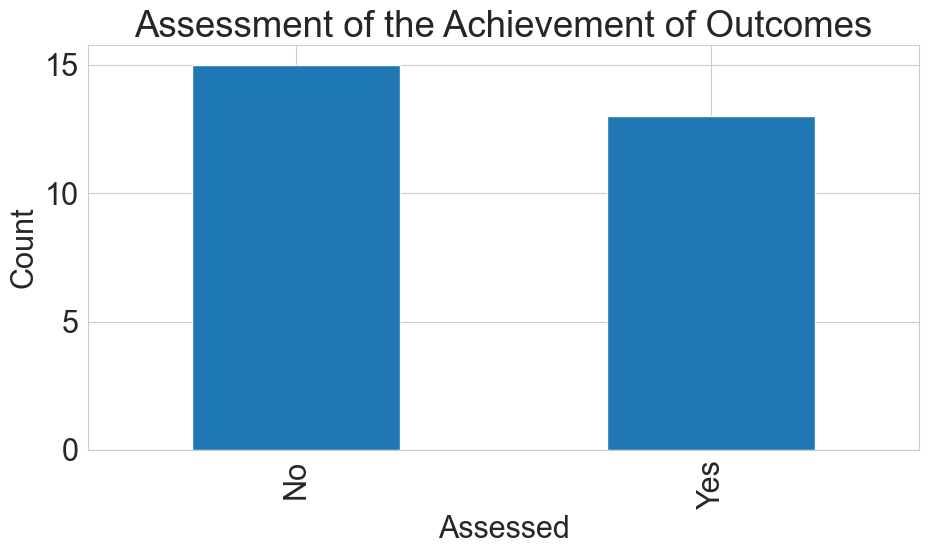

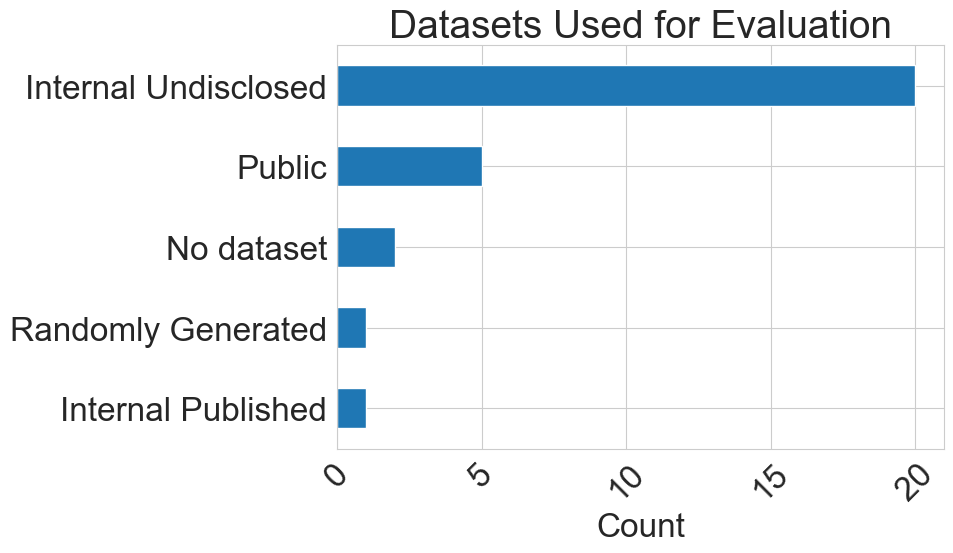

In [31]:
# Adjusting data for specific visualizations where entries separated by a newline should be counted separately

# Function to split entries by newline and flatten the list
def split_and_flatten(series):
    return series.str.split('\n').explode()

# Adjusting 'Context', 'Supported Tasks', and 'Dataset' based on the new instruction
supported_tasks_adjusted = split_and_flatten(df['Supported Tasks'])
datasets_used_adjusted = split_and_flatten(df['Dataset'])

# Recalculating distributions with adjustments
supported_tasks_distribution = supported_tasks_adjusted.value_counts().head(10)  # Still limiting to top 10 for readability
datasets_used_distribution = datasets_used_adjusted.value_counts().head(10)  # Still limiting to top 10 for readability



# Create separate plots for each visualization based on the adjusted data

# 1. Distribution of Papers Over Years
plt.figure(figsize=(10, 6))
sns.lineplot(x=papers_per_year.index, y=papers_per_year.values, marker="o")
plt.title("Distribution of Papers Over Years", fontsize=28)
plt.xlabel("", fontsize=24)
plt.ylabel("Number of Papers", fontsize=24)
plt.tick_params(labelsize=24)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2. Distribution of Papers by Source
plt.figure(figsize=(10, 6))
papers_by_source.plot(kind='bar')
plt.title("Distribution of Papers by Source", fontsize=28)
plt.xlabel("")
plt.ylabel("Number of Papers", fontsize=24)
plt.tick_params(labelsize=24)
# use integers
plt.yticks(range(0, 16, 3))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# End Users
plt.figure(figsize=(10, 6))
end_users.plot(kind='bar')
plt.title("Distribution of End Users", fontsize=28)
plt.xlabel("", fontsize=24)
plt.ylabel("Count", fontsize=24)
plt.tick_params(labelsize=24)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Recommendation Methods
plt.figure(figsize=(10, 6))
recommendation_methods.plot(kind='bar')
plt.title("Recommendation Methods", fontsize=28)
plt.xlabel("", fontsize=24)
plt.ylabel("Count", fontsize=24)
plt.tick_params(labelsize=24)
plt.xticks(rotation=45)
# use integers
plt.yticks(range(0, 14, 2))
plt.tight_layout()
plt.show()

# Inclusion of Learning Outcomes
plt.figure(figsize=(10, 6))
learning_outcomes_inclusion.plot(kind='bar')
plt.title("Inclusion of Learning Outcomes")
plt.xlabel("Included")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Assessment of the Achievement of Outcomes
plt.figure(figsize=(10, 6))
assessment_of_outcomes.plot(kind='bar')
plt.title("Assessment of the Achievement of Outcomes")
plt.xlabel("Assessed")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# Adjusted Dataset Used for Evaluation
plt.figure(figsize=(10, 6))
datasets_used_distribution.plot(kind='barh')
plt.title("Datasets Used for Evaluation", fontsize=28)
plt.ylabel("", fontsize=24)
plt.xlabel("Count", fontsize=24)
plt.tick_params(labelsize=24)
plt.xticks(rotation=45)
# bigger on top
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
